In [3]:
import pandas as pd
import numpy as np
import re

In [4]:
df = pd.read_csv('train_E6oV3lV.csv')

In [5]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [6]:
def preprocess_tweet(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove user tags
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove special characters (including numbers if needed)
    text = re.sub(r'\W', ' ', text)
    # Remove numbers
    text = re.sub(r'\d', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply the preprocessing to the 'tweet' column
df['processed_tweet'] = df['tweet'].apply(preprocess_tweet)

# Display the first few rows of the processed data
df.tail()


,id,label,tweet,processed_tweet
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuuðððððððððâï
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to w...
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",vandalised in in condemns act
31961,31962,0,thank you @user for you follow,thank you for you follow


In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize the lemmatizer and stopwords list
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def process_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    # Removing Stop Words and Lemmatization
    processed_text = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(processed_text)

# Apply the text processing to the 'processed_tweet' column
df['final_processed_tweet'] = df['processed_tweet'].apply(process_text)

# Display the first few rows of the final processed data
df.head()


[nltk_data] Downloading package punkt to /Users/sushanth/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sushanth/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sushanth/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,id,label,tweet,processed_tweet,final_processed_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...,father dysfunctional selfish drag kid dysfunction
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for credit i cant use cause they dont o...,thanks credit cant use cause dont offer wheelc...
2,3,0,bihday your majesty,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ...,i love u take with u all the time in urð ðððð ððð,love u take u time urð ðððð ððð
4,5,0,factsguide: society now #motivation,factsguide society now,factsguide society


In [8]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def clean_text_regex(text):
    # Removing special characters and digits using regex
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Removing extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply the regex cleaning to the 'processed_tweet' column
df['cleaned_tweet'] = df['final_processed_tweet'].apply(clean_text_regex)

# Initialize the CountVectorizer (BoW)
bow_vectorizer = CountVectorizer(max_features=5000, stop_words='english')

# Apply BoW on the cleaned data
bow_features = bow_vectorizer.fit_transform(df['cleaned_tweet'])

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Apply TF-IDF on the cleaned data
tfidf_features = tfidf_vectorizer.fit_transform(df['cleaned_tweet'])

# Convert to DataFrame for better visualization (optional)
bow_df = pd.DataFrame(bow_features.toarray(), columns=bow_vectorizer.get_feature_names_out())
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())


In [9]:
df.head()

,id,label,tweet,processed_tweet,final_processed_tweet,cleaned_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...,father dysfunctional selfish drag kid dysfunction,father dysfunctional selfish drag kid dysfunction
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for credit i cant use cause they dont o...,thanks credit cant use cause dont offer wheelc...,thanks credit cant use cause dont offer wheelc...
2,3,0,bihday your majesty,bihday your majesty,bihday majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ...,i love u take with u all the time in urð ðððð ððð,love u take u time urð ðððð ððð,love u take u time ur
4,5,0,factsguide: society now #motivation,factsguide society now,factsguide society,factsguide society


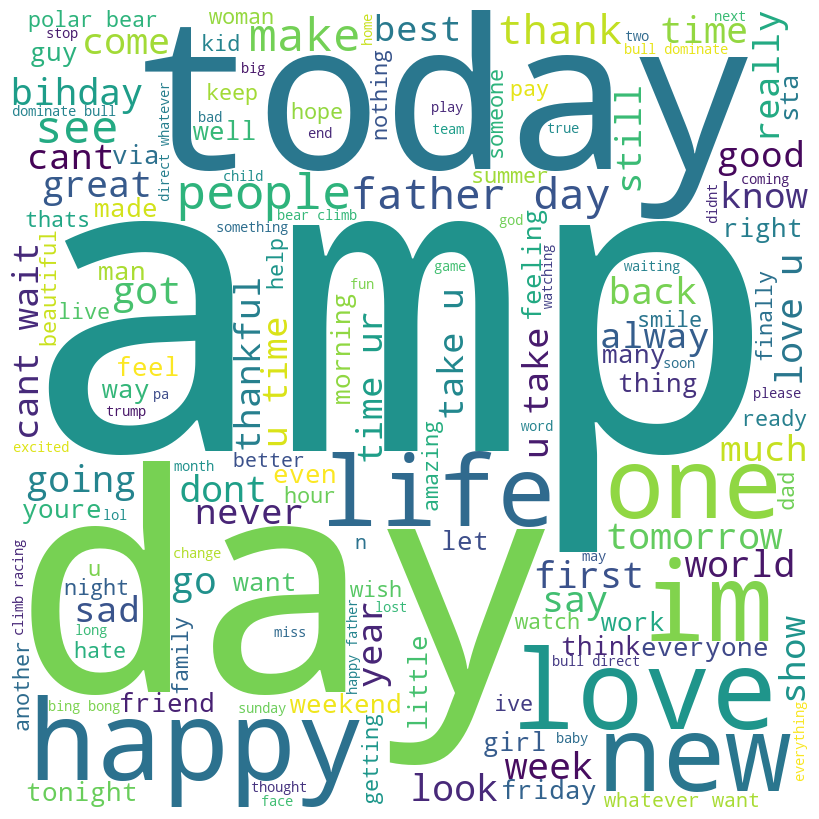

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all tweets into a single string
all_tweets = ' '.join(df['cleaned_tweet'])

# Create a word cloud
wordcloud = WordCloud(width=800, height=800, 
                      background_color='white', 
                      max_words=150).generate(all_tweets)

# Plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()


/Users/sushanth/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


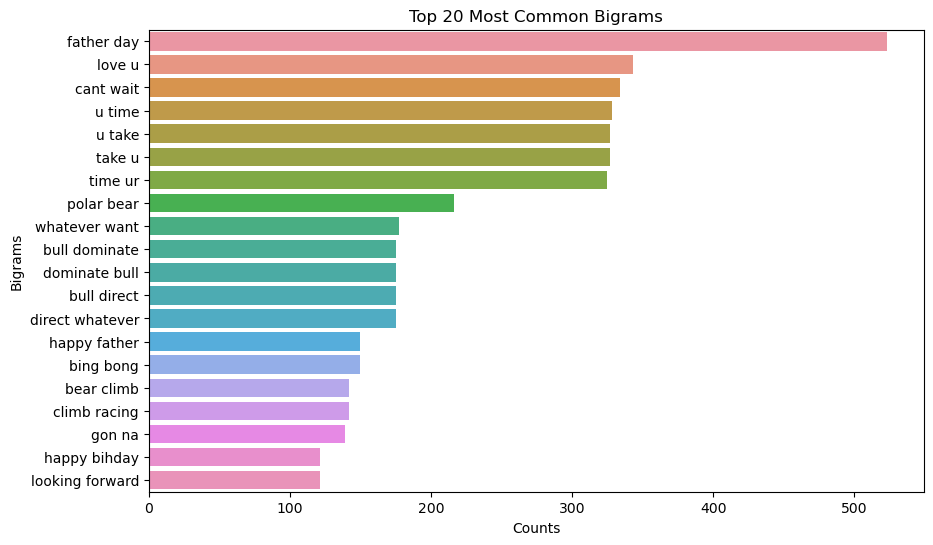

/Users/sushanth/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


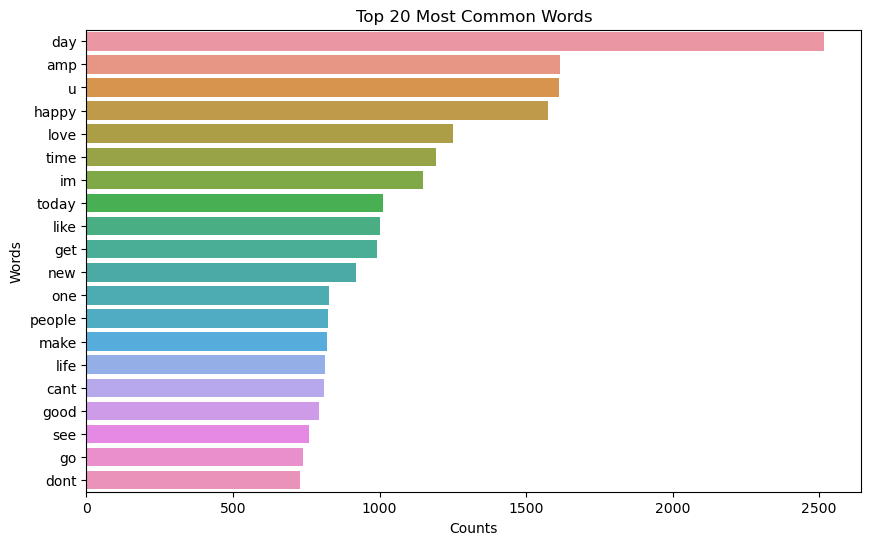

In [11]:
from nltk.probability import FreqDist
from nltk.util import ngrams
import seaborn as sns
import matplotlib.pyplot as plt

# Function to generate n-grams
def generate_ngrams(text, n=2):
    words = text.split()
    return list(ngrams(words, n))

# Generating bigrams for the dataset
bigrams = [bigram for tweet in df['cleaned_tweet'] for bigram in generate_ngrams(tweet, n=2)]

# Frequency distribution of bigrams
fdist_bigrams = FreqDist(bigrams)

# Prepare data for the histogram of the most common bigrams
most_common_bigrams = fdist_bigrams.most_common(20)
bigram_labels = [' '.join(bigram) for bigram, _ in most_common_bigrams]
bigram_counts = [count for _, count in most_common_bigrams]

# Plotting the histogram for bigrams
plt.figure(figsize=(10, 6))
sns.barplot(x=bigram_counts, y=bigram_labels)
plt.title('Top 20 Most Common Bigrams')
plt.xlabel('Counts')
plt.ylabel('Bigrams')
plt.show()

# Frequency distribution of individual words
fdist = FreqDist(word for tweet in df['cleaned_tweet'] for word in tweet.split())

# Prepare data for the histogram of the most common words
most_common_words = fdist.most_common(20)
word_labels = [word for word, _ in most_common_words]
word_counts = [count for _, count in most_common_words]

# Plotting the histogram for individual words
plt.figure(figsize=(10, 6))
sns.barplot(x=word_counts, y=word_labels)
plt.title('Top 20 Most Common Words')
plt.xlabel('Counts')
plt.ylabel('Words')
plt.show()


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_features, df['label'], test_size=0.3, random_state=42)

print("X_train", X_train.shape)
print("y_train", y_train.shape)

print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (22373, 5000)
y_train (22373,)
X_test (9589, 5000)
y_test (9589,)


In [14]:
# Initialize the Naive Bayes Classifier
nb_classifier = MultinomialNB()

# Train the model
nb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.9421211805193451

In [15]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression Classifier
logreg_classifier = LogisticRegression(max_iter=1000)

# Train the model
logreg_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg = logreg_classifier.predict(X_test)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
classification_rep_logreg = classification_report(y_test, y_pred_logreg)

accuracy_logreg

0.9413911773907603

Epoch 1/10
700/700 [==============================] - 30s 41ms/step - loss: 0.2376 - accuracy: 0.9317 - val_loss: 0.1689 - val_accuracy: 0.9459
Epoch 2/10
700/700 [==============================] - 29s 41ms/step - loss: 0.1358 - accuracy: 0.9542 - val_loss: 0.1535 - val_accuracy: 0.9502
Epoch 3/10
700/700 [==============================] - 29s 41ms/step - loss: 0.0978 - accuracy: 0.9671 - val_loss: 0.1634 - val_accuracy: 0.9509
Epoch 4/10
700/700 [==============================] - 29s 41ms/step - loss: 0.0730 - accuracy: 0.9758 - val_loss: 0.1884 - val_accuracy: 0.9424
Epoch 5/10
700/700 [==============================] - 29s 41ms/step - loss: 0.0526 - accuracy: 0.9838 - val_loss: 0.2096 - val_accuracy: 0.9410
Epoch 6/10
700/700 [==============================] - 28s 41ms/step - loss: 0.0374 - accuracy: 0.9880 - val_loss: 0.2403 - val_accuracy: 0.9425
Epoch 7/10
700/700 [==============================] - 28s 41ms/step - loss: 0.0300 - accuracy: 0.9904 - val_loss: 0.2764 - val_accuracy:

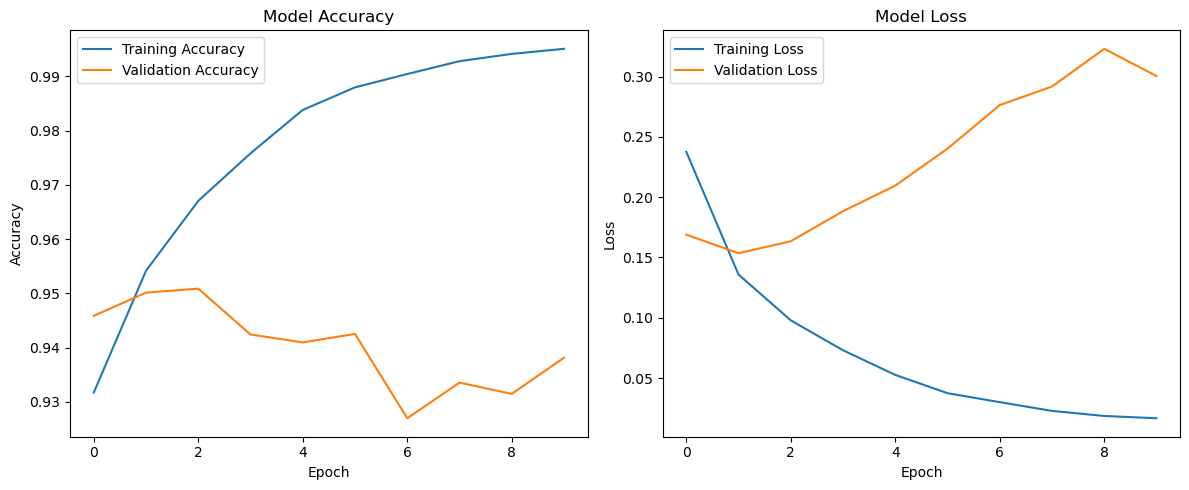

300/300 [==============================] - 3s 9ms/step


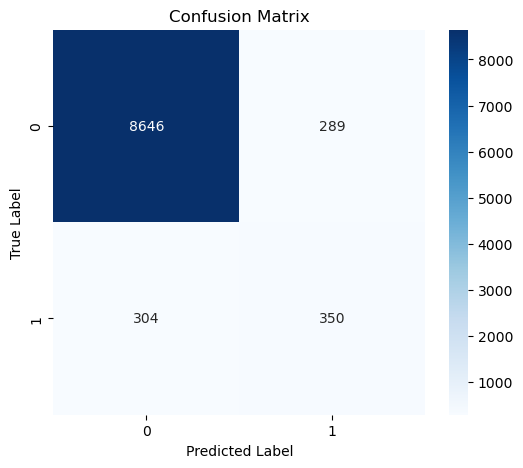

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8935
           1       0.55      0.54      0.54       654

    accuracy                           0.94      9589
   macro avg       0.76      0.75      0.75      9589
weighted avg       0.94      0.94      0.94      9589



In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import numpy as np


# Parameters
vocab_size = 10000
max_length = 120
embedding_dim = 16
trunc_type = 'post'
oov_tok = "<OOV>"

# Tokenize the text
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(df['cleaned_tweet'])
sequences = tokenizer.texts_to_sequences(df['cleaned_tweet'])
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(padded, df['label'], test_size=0.3)

# Build the LSTM model
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Save the model
model.save('lstm_model.h5')

# Plotting training and validation accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

# Predicting on test data
predictions = model.predict(X_test)
# Thresholding predictions to convert them from probabilities to binary
predictions = (predictions > 0.5).astype(int)

# Generating confusion matrix
conf_matrix = confusion_matrix(y_test, predictions.flatten())

# Plotting the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Classification report
print(classification_report(y_test, predictions.flatten()))


In [66]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the model
model = load_model('lstm_model.h5')

# Preprocess the new data
new_text = ["People of [X] race should be harmed."]
sequences = tokenizer.texts_to_sequences(new_text)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

# Make predictions
predictions = model.predict(padded, verbose=0)
predicted_label = 'Hate Speech' if predictions[0] > 0.5 else 'Free Speech'
print(predicted_label)

Hate Speech


In [41]:
# Preprocess the new data 
new_text = ["I disagree with the government's economic policy because it neglects low-income families"]
sequences = tokenizer.texts_to_sequences(new_text)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

# Make predictions
predictions = model.predict(padded, verbose=0)
predicted_label = 'Hate Speech' if predictions[0] > 0.5 else 'Free Speech'
print(predicted_label)

Free Speech


In [73]:
new_text = ["I believe in pacifism and oppose all forms of violence."]
sequences = tokenizer.texts_to_sequences(new_text)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

# Make predictions
predictions = model.predict(padded, verbose=0)
predicted_label = 'Hate Speech' if predictions[0] > 0.5 else 'Free Speech'
print(predicted_label)

Free Speech
